In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [3]:
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

X_train = train_data.drop(columns=['median_house_value'])
y_train = train_data['median_house_value']

X_val = val_data.drop(columns=['median_house_value'])
y_val = val_data['median_house_value']

X_test = test_data.drop(columns=['median_house_value'])
y_test = test_data['median_house_value']

In [4]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_test = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Decision Tree - MAE: {mae}, MSE: {mse}, R²: {r2}')


Decision Tree - MAE: 45197.5242248062, MSE: 4876429992.969961, R²: 0.625859272739402


In [5]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_dt = grid_search.best_estimator_

combined_X = pd.concat([X_train, X_val])
combined_y = pd.concat([y_train, y_val])

best_dt.fit(combined_X, combined_y)

y_test_pred = best_dt.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Optimized Decision Tree - MAE: {test_mae}, MSE: {test_mse}, R²: {test_r2}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Optimized Decision Tree - MAE: 39421.611998712935, MSE: 3619320527.6571593, R²: 0.7223101292627945


In [6]:
import pickle

with open('optimized_decision_tree.pkl', 'wb') as dt_file:
    pickle.dump(best_dt, dt_file)


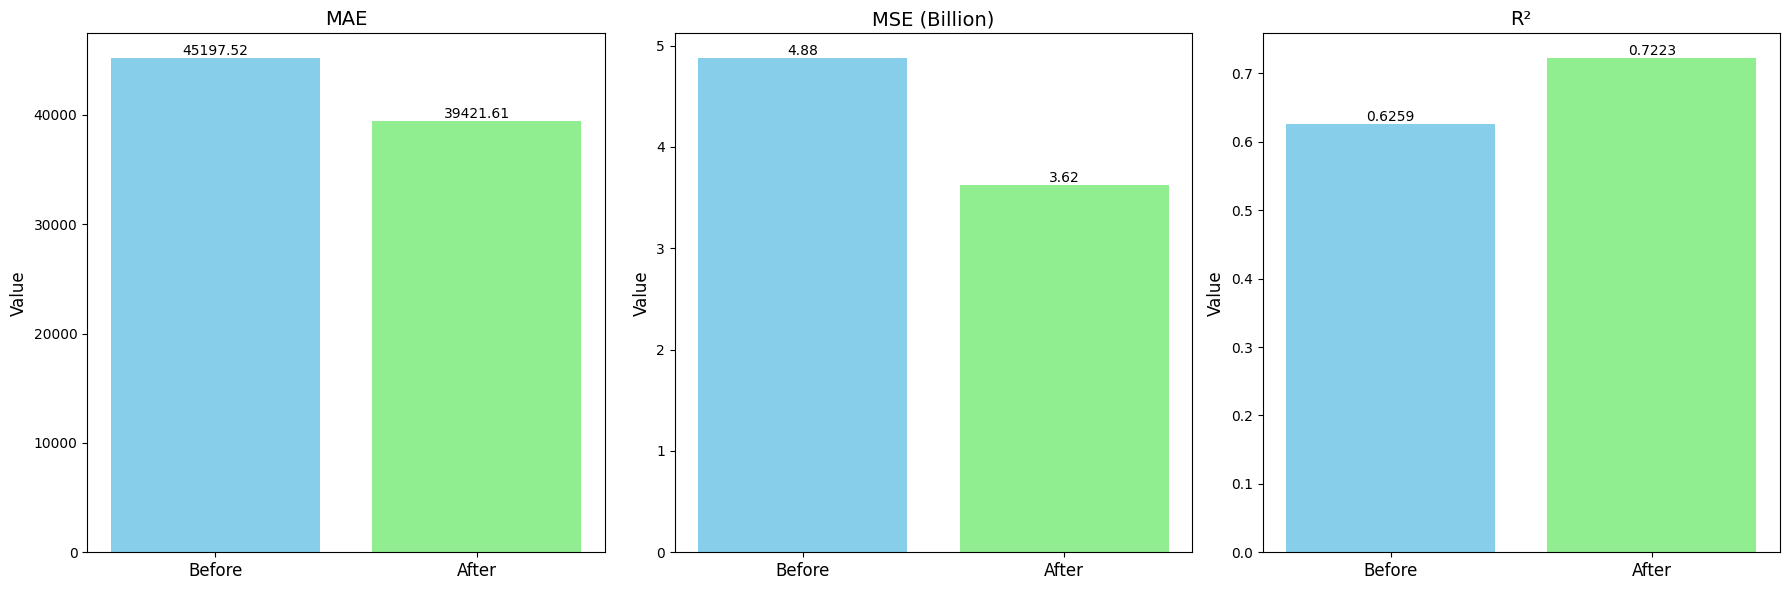

In [7]:
import matplotlib.pyplot as plt

# Data for each metric
metrics_individual = ['MAE', 'MSE (Billion)', 'R²']
before_values = [mae, mse/1e9, r2]
after_values = [test_mae, test_mse/1e9, test_r2]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each metric and create individual plots
for i, ax in enumerate(axes):
    ax.bar(['Before', 'After'], [before_values[i], after_values[i]], color=['skyblue', 'lightgreen'])
    ax.set_title(metrics_individual[i], fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Before', 'After'], fontsize=12)
    
    # Annotate bars
    for j, value in enumerate([before_values[i], after_values[i]]):
        ax.text(j, value, f'{value:.2f}' if i < 2 else f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
